In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from tqdm import tqdm
import random
import pickle as pkl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
path = '/Users/somayeh/Research_Data/FULL_ELASTICC_TRAIN/CSV/'

In [88]:
colors ={'u':"#00c2f2",
         'g':"#59b359",
         'r':"#e51f00",
         'i':"#502db3",
         'z':"#ffaa00",
         'y':"#f2b6de"
        }

classes = ['uLens-Single',
           'uLens-Binary']
# ['Cepheid',
#            'AGN',
#            'RRL',
#            'EB',
#            'Mdwarf',
           
#            'CART',
#            'SNIa',
#            'SNIb',
#            'SNIc',
#            'd-Sct']
           
           

In [106]:
n_lc_per_class = 40000
thresh = 3
dict_all = {}
random.seed(5)
for c in tqdm(classes):
    print(c)
    dict_all[c] = {}
    path_class = path+c+'/'
    list_lc = glob.glob(path_class+'*')
    if len(list_lc)<n_lc_per_class:
        n_lc_per_class = len(list_lc)
        print(n_lc_per_class)
    lcs_path = random.sample(list_lc, n_lc_per_class)
    for i, lc_path in enumerate(lcs_path):
        df = pd.read_csv(lc_path)
        # print(df.columns)
        try:
            df = df[(df.f/df.ferr)>thresh]
        except AttributeError:
            continue
        if np.sum(df.groupby('b').size().values[1:])<20:
            continue
        dict_all[c][i] = df.values[:,1:]
    
    


  0%|                                                                          | 0/2 [00:00<?, ?it/s]

uLens-Single
17640


 50%|█████████████████████████████████                                 | 1/2 [00:19<00:19, 19.60s/it]

uLens-Binary
4231


100%|██████████████████████████████████████████████████████████████████| 2/2 [00:24<00:00, 12.17s/it]


In [107]:
pkl.dump(dict_all, open('all_data_muLens_larger_than_3sigma.pkl', 'wb'))

In [109]:
len(list(dict_all['uLens-Single'].keys()))

6377

In [110]:
list(dict_all.keys())

['uLens-Single', 'uLens-Binary']

Text(0, 0.5, 'Flux')

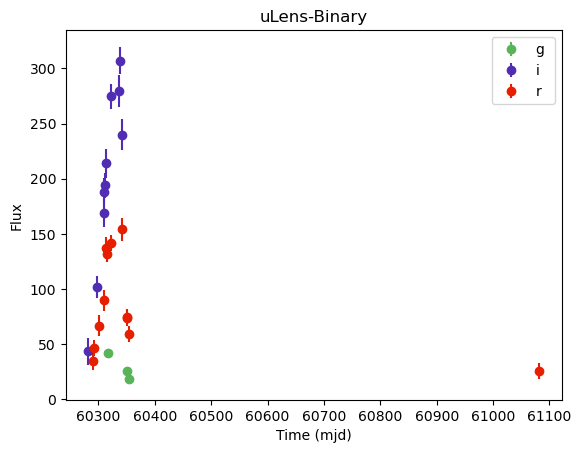

In [117]:
# Read an example light curve
i = list(dict_all[labels[label_ind]].keys())[4]
thresh = 3
labels = list(dict_all.keys())
label_ind = 1
data = dict_all[labels[label_ind]][i]


df = pd.DataFrame(data = data, columns=['t', 'f', 'ferr', 'b'])
bands = np.unique(df['b'].values)

for band in bands:    
    df_b = df[df.b==band]
    plt.errorbar(df_b.t, 
                 df_b.f, 
                 yerr = df_b.ferr,
                 fmt = 'o',
                 color = colors[band.strip()],
                label = band)
    # plt.plot(df_b.t[(df_b.f/df_b.ferr)>thresh],
    #          df_b.f[(df_b.f/df_b.ferr)>thresh],
    #          'o', color='orange')
    
plt.legend()
plt.title(labels[label_ind])
plt.xlabel('Time (mjd)')
plt.ylabel('Flux')